<a href="https://colab.research.google.com/github/marce3-2140/Unsupervised-ML-Models/blob/main/Customer_Segmentation_with_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Customer Segmentation**

* Tomado de: [Customer-Segmentation-Kaggle](https://github.com/Nikhil-Adithyan/Customer-Segmentation-with-K-Means)

* La tarea es realizar la segmentación del cliente utilizando k-medias Estamos interesados en agrupar a nuestros clientes en grupos con características similares. Esto puede ayudar a la empresa a asignar recursos de marketing de manera eficaz. Utilizaremos la edad del cliente, su educación, sus años de trabajo, sus ingresos, sus deudas, si ha incumplido o no y su deuda a la proporción de ingresos para agruparlos en segmentos.

## Librerias

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
# librerias
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.style as style
from mpl_toolkits.mplot3d import Axes3D
from termcolor import colored as cl
import matplotlib.cm as cm

#Preprocesamiento
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# modelar
from sklearn.cluster import KMeans
# metricas
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

**Cargar Datos**

In [10]:
file = ('/content/drive/MyDrive/CodingDojo/Cargas/No_Supervised/cust_seg.csv')
df = pd.read_csv(file)
df.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [11]:
df.columns

Index(['Unnamed: 0', 'Customer Id', 'Age', 'Edu', 'Years Employed', 'Income',
       'Card Debt', 'Other Debt', 'Defaulted', 'DebtIncomeRatio'],
      dtype='object')

##**I. Analisis Exploratorio de Datos**

In [12]:
df.drop('Unnamed: 0', axis = 1, inplace = True)
df.set_index('Customer Id', inplace = True)

In [13]:
df = df.drop(columns=['Edu','Defaulted'])

In [14]:
df.head()

,Age,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
Customer Id,,,,,,
1,41,6,19,0.124,1.073,6.3
2,47,26,100,4.582,8.218,12.8
3,33,10,57,6.111,5.802,20.9
4,29,4,19,0.681,0.516,6.3
5,47,31,253,9.308,8.908,7.2


In [15]:
df.columns

Index(['Age', 'Years Employed', 'Income', 'Card Debt', 'Other Debt',
       'DebtIncomeRatio'],
      dtype='object')

In [16]:
df.describe(include='all')

,Age,Years Employed,Income,Card Debt,Other Debt,DebtIncomeRatio
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000
mean,35.029412,8.565882,46.675294,1.576820,3.078773,10.171647
std,8.041432,6.777884,38.543054,2.125843,3.398799,6.719441
min,20.000000,0.000000,13.000000,0.012000,0.046000,0.100000
25%,29.000000,3.000000,24.000000,0.382500,1.045750,5.100000
50%,34.000000,7.000000,35.000000,0.885000,2.003000,8.700000
75%,41.000000,13.000000,55.750000,1.898500,3.903250,13.800000
max,56.000000,33.000000,446.000000,20.561000,35.197000,41.300000


In [17]:
df.duplicated().sum()

0

In [18]:
df.isnull().sum()

Age                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 850 entries, 1 to 850
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Years Employed   850 non-null    int64  
 2   Income           850 non-null    int64  
 3   Card Debt        850 non-null    float64
 4   Other Debt       850 non-null    float64
 5   DebtIncomeRatio  850 non-null    float64
dtypes: float64(3), int64(3)
memory usage: 46.5 KB


In [20]:
'''defaulted = df['Defaulted'].isna().sum()
percent_default = (defaulted/len(df))*100
print(f"La columna BMI tiene {percent_default:.2f}% de datos nulos")'''

'defaulted = df[\'Defaulted\'].isna().sum()\npercent_default = (defaulted/len(df))*100\nprint(f"La columna BMI tiene {percent_default:.2f}% de datos nulos")'

In [21]:
'''#Filtramos los datos inconsistentes para conocer la relacion con otras columnas
nulos = df['Defaulted'] == 1.0
df.loc[nulos,:].head()'''

"#Filtramos los datos inconsistentes para conocer la relacion con otras columnas\nnulos = df['Defaulted'] == 1.0\ndf.loc[nulos,:].head()"

In [22]:
'''df = df.dropna()'''

'df = df.dropna()'

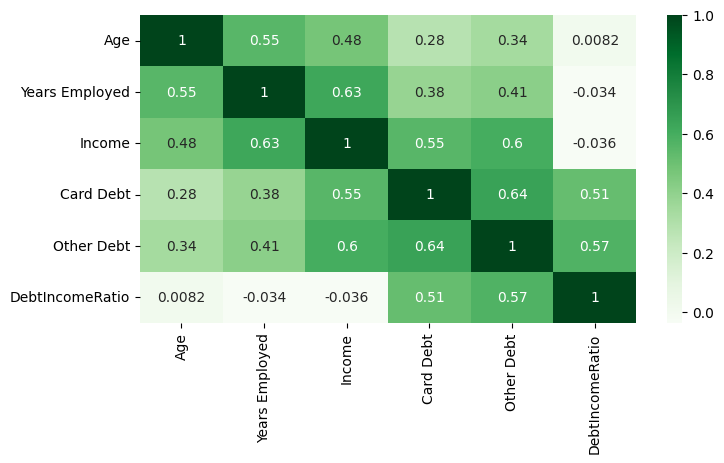

In [23]:
#Identificamos correlaciones entree las columnas
corr = df.corr()
plt.figure(figsize=(8,4)) #Grafico Size
sns.heatmap(corr, cmap="Greens", annot=True); #Creamos el mapa de calor
plt.show();

In [24]:
df.isnull().sum()

Age                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
DebtIncomeRatio    0
dtype: int64

## **II. Visualizacion de Datos**

<ipython-input-25-41308dcd9473>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age'],


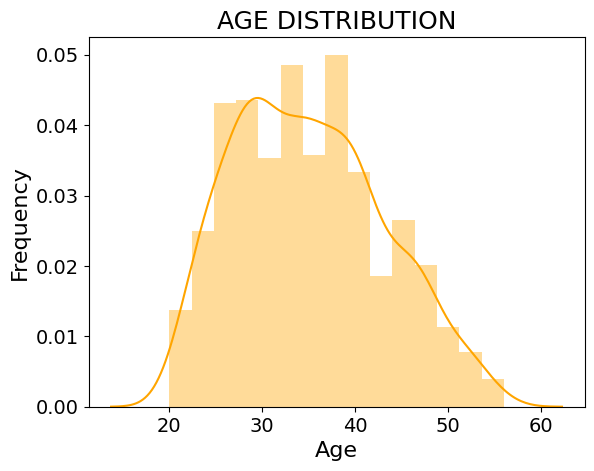

In [25]:
sns.distplot(df['Age'],
             color = 'orange')
plt.title('AGE DISTRIBUTION',
          fontsize = 18)
plt.xlabel('Age',
           fontsize = 16)
plt.ylabel('Frequency',
           fontsize = 16)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)

plt.savefig('age_distribution.png')
plt.show()

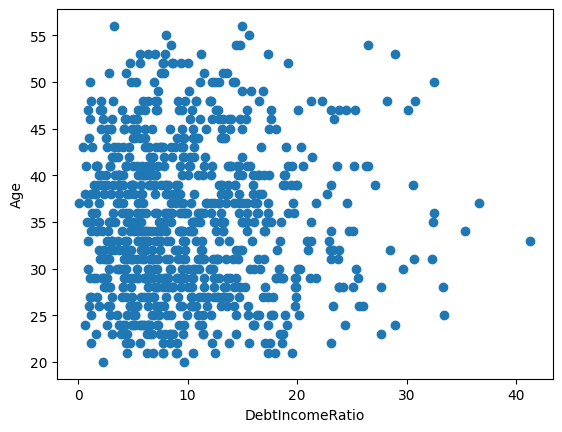

In [26]:
# Visualize data
plt.scatter(df['DebtIncomeRatio'], df['Age'])
plt.xlabel('DebtIncomeRatio')
plt.ylabel('Age');

> Nota: Aunque la correlacion no es muy significativa, a medida que aumneta el DebIncomeRatio disminuy el Incumplimiento.

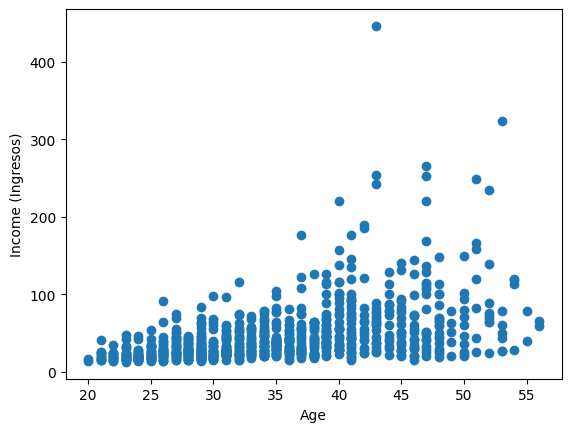

In [27]:
# Visualize data
plt.scatter(df['Age'], df['Income'])
plt.xlabel('Age')
plt.ylabel('Income (Ingresos)');

## **II. Preprocesado**

In [28]:
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

> Nota:

* ¡k-medias puede ajustar cualquier número de columnas!, En este ejemplo solo estamos encajando dos columnas para fines de trazado, sin embargo, de manera realista, la mayoría de los datos con los que trabajamos será multidimensional.

* Si es posible, podemos usar el conocimiento del dominio o trabajar con un experto en la materia para determinar qué características se deberían incluir y cuántos agrupamientos son razonables. También podemos utilizar puntuaciones como Silhouette Score (puntuación de silueta) para determinar si nuestras agrupaciones están bien definidas.

In [29]:
#Instanciamos K-medias
kmeans = KMeans(n_clusters=2)
kmeans.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [30]:
kmeans.labels_

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,

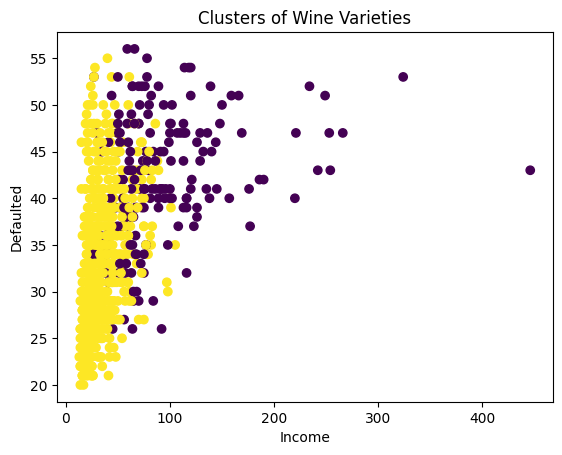

In [31]:
# Guardar las etiquetas del cluster en el marco de datos
df['cluster'] = kmeans.labels_
# Visualize the clusters
plt.scatter(df['Income'], df['Age'], c = df['cluster'])
plt.xlabel('Income')
plt.ylabel('Defaulted')
plt.title('Clusters of Wine Varieties');

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

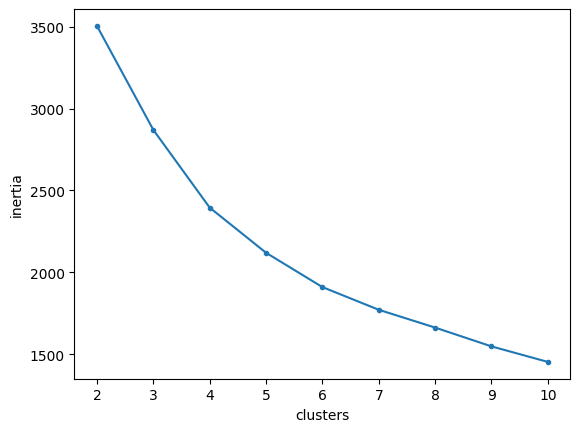

In [32]:
#Create an empty list of inertias
inertias = []
#Loop through k values between 2 and 10 and store the inertias in the list.
for k in range(2,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(scaled_df)
    inertias.append(kmeans.inertia_)
#Visualize scores
plt.plot(range(2,11), inertias, marker = '.')
plt.xlabel('clusters')
plt.ylabel('inertia')
plt.show()

> Nota: En el trazado de línea superior, vemos que el gráfico comienza para nivelarse en 3 clústeres.  Esto se parece a la curva de un brazo, por lo que se llama "codo". Por lo tanto, el 3 sería un candidato para un buen número de clústeres.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

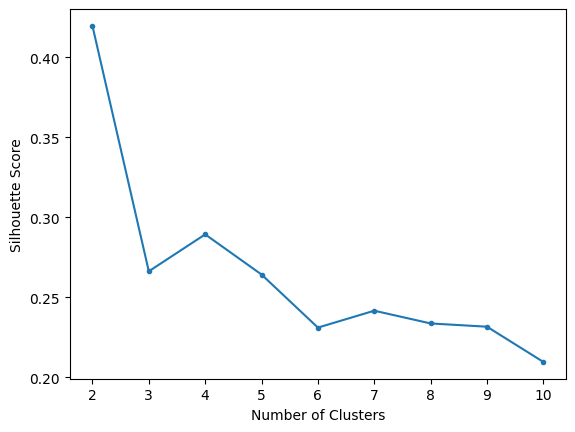

In [33]:
# Visualize different silhouette scores
# Save silhouette scores for various cluster numbers in list
silhouette_scores = []
for i in range(2, 11):
  kmeans = KMeans(n_clusters = i)
  kmeans.fit(scaled_df)
  silhouette_scores.append(silhouette_score(scaled_df, kmeans.labels_))
# Visualize scores
plt.plot(range(2, 11), silhouette_scores, marker = '.')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score');

> Nota: De acuerdo con el trazado anterior, ¿cuál es el mejor número de clústeres para estos datos? (¡Recuerden que entre más sean altas las puntuaciones de silueta, mejor!) Podemos ver del trazado anterior que 2 sería el mejor número de clústeres para nuestros datos debido a que tiene la puntuación de silueta más alta.

> Nota: Para este ejemplo, la puntuación de silueta nos da una diferente sugerencia para el agrupamiento que el trazado de codo de inercias.  Recuerden, no existe una manera precisa de determinar el mejor número de clústeres.  Visualicemos los clústeres 2 y 3 para ver si podemos determinar el mejor clúster visualmente.

In [36]:
# Fit kmeans model with 2 clusters and display the silhouette score
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)
silhouette_score(scaled_df, kmeans.labels_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.4197251542214446

In [37]:
# Fit 2 different KMeans models, one with 2 clusters and one with 3 clusters
kmeans2 = KMeans(n_clusters = 2)
kmeans3 = KMeans(n_clusters = 3)
kmeans4 = KMeans(n_clusters = 4)

kmeans2.fit(scaled_df)
kmeans3.fit(scaled_df)
kmeans4.fit(scaled_df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

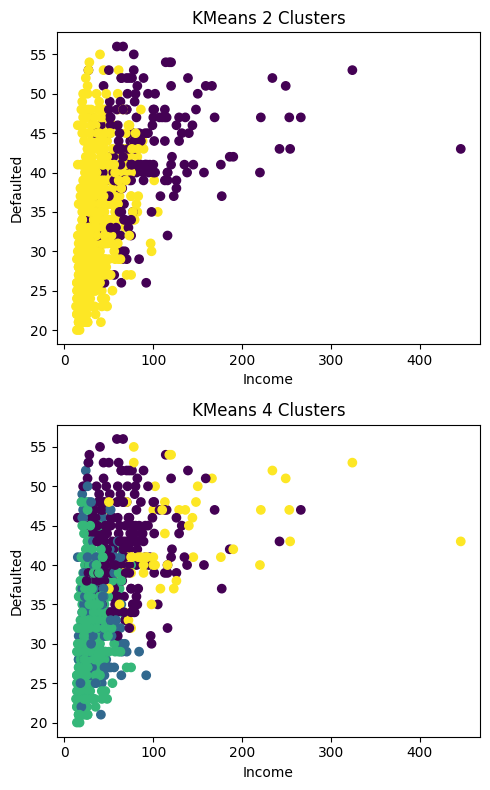

In [38]:
# Save the cluster labels to the dataframe
df['cluster2'] = kmeans2.labels_
df['cluster3'] = kmeans4.labels_
# Visualize the clusters
fig, axes = plt.subplots(2,1, figsize=(5,8))
axes[0].scatter(df['Income'], df['Age'], c = df['cluster2'])
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Defaulted')
axes[0].set_title('KMeans 2 Clusters')
axes[1].scatter(df['Income'], df['Age'], c = df['cluster3'])
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Defaulted')
axes[1].set_title('KMeans 4 Clusters')
plt.tight_layout();

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.4197251542214446


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.2668682639357336
For n_clusters = 4 The average silhouette_score is : 0.2885315122099658


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.26560161397246507
For n_clusters = 6 The average silhouette_score is : 0.2320424859187056


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


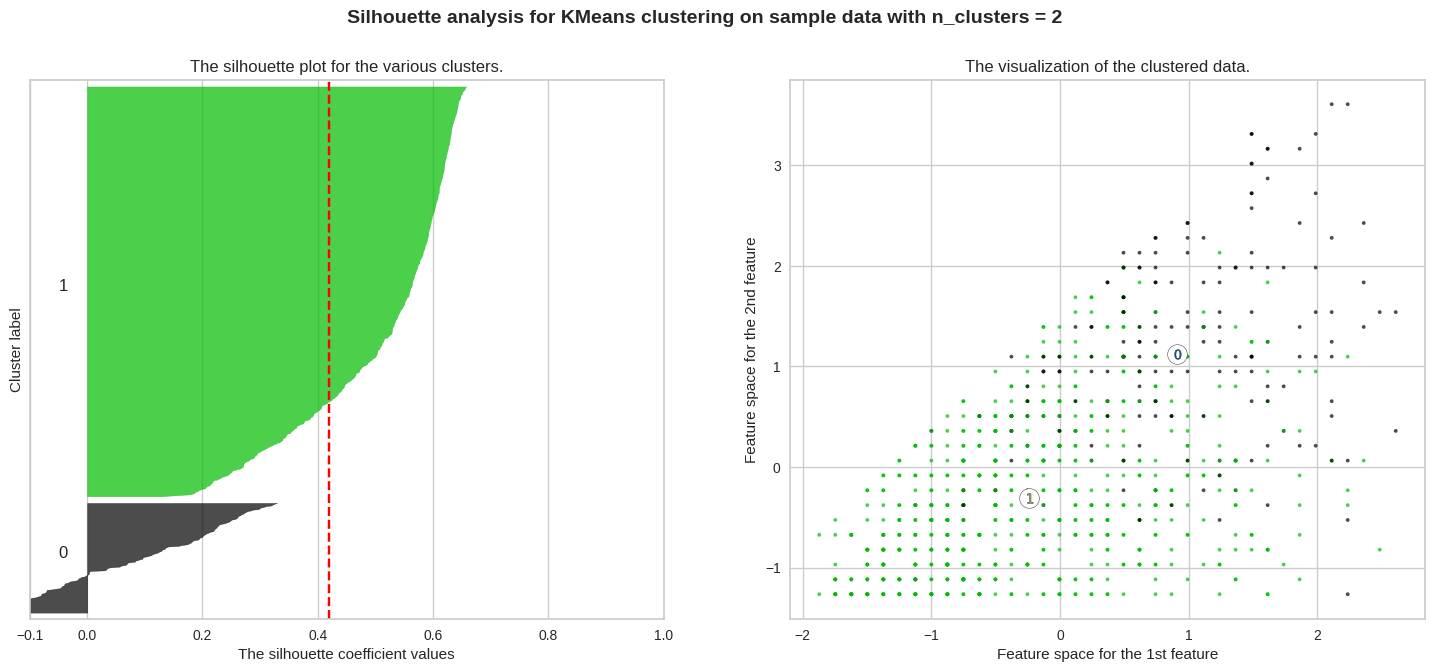

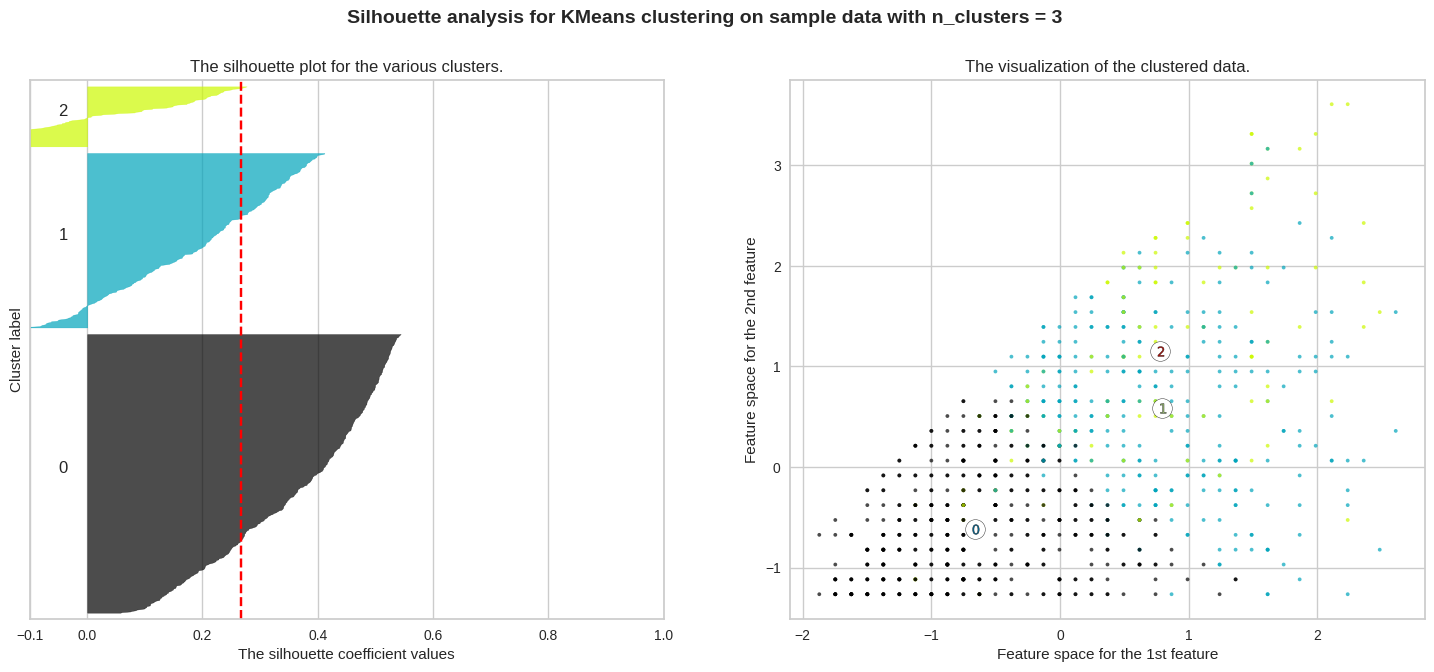

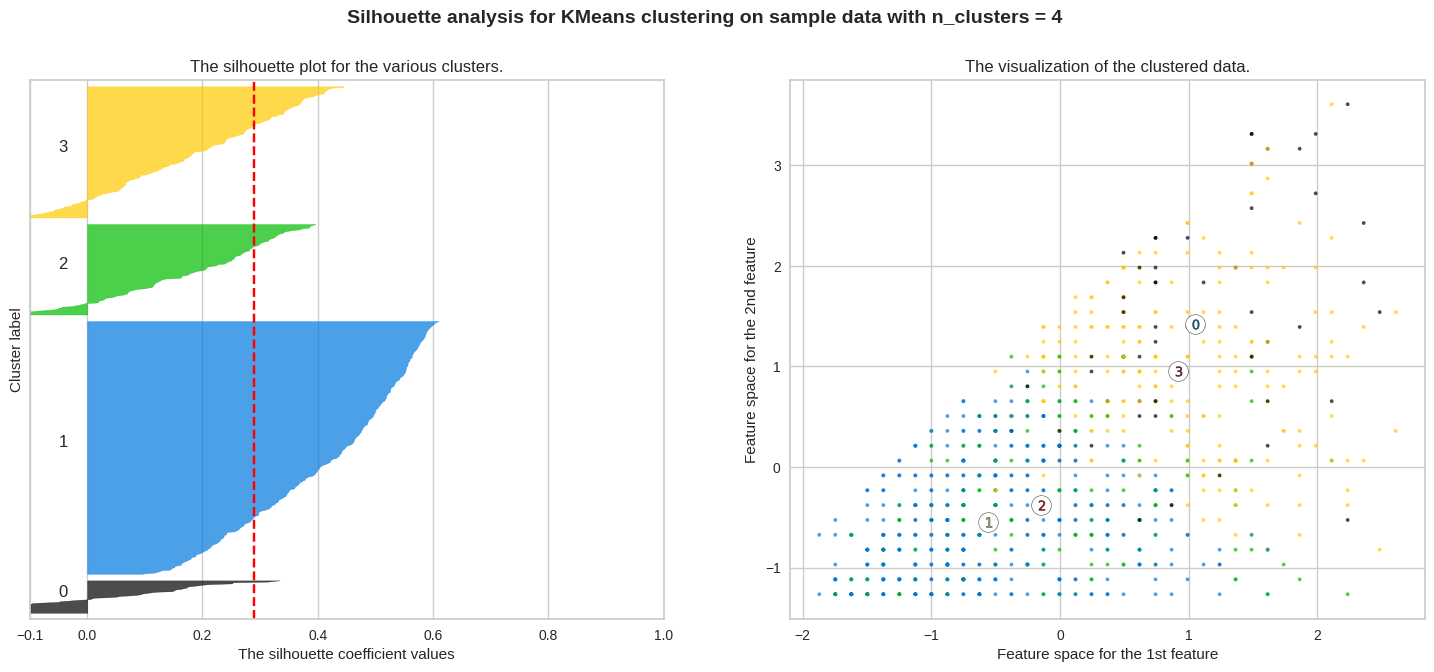

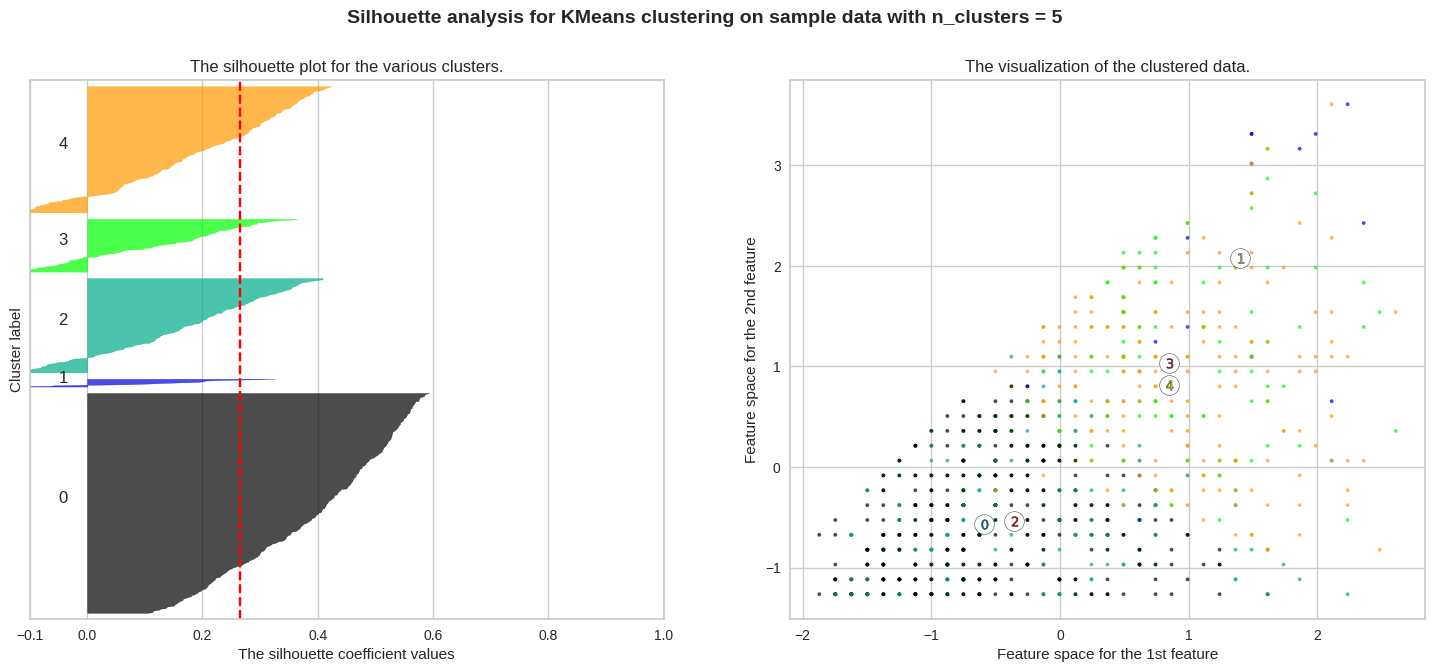

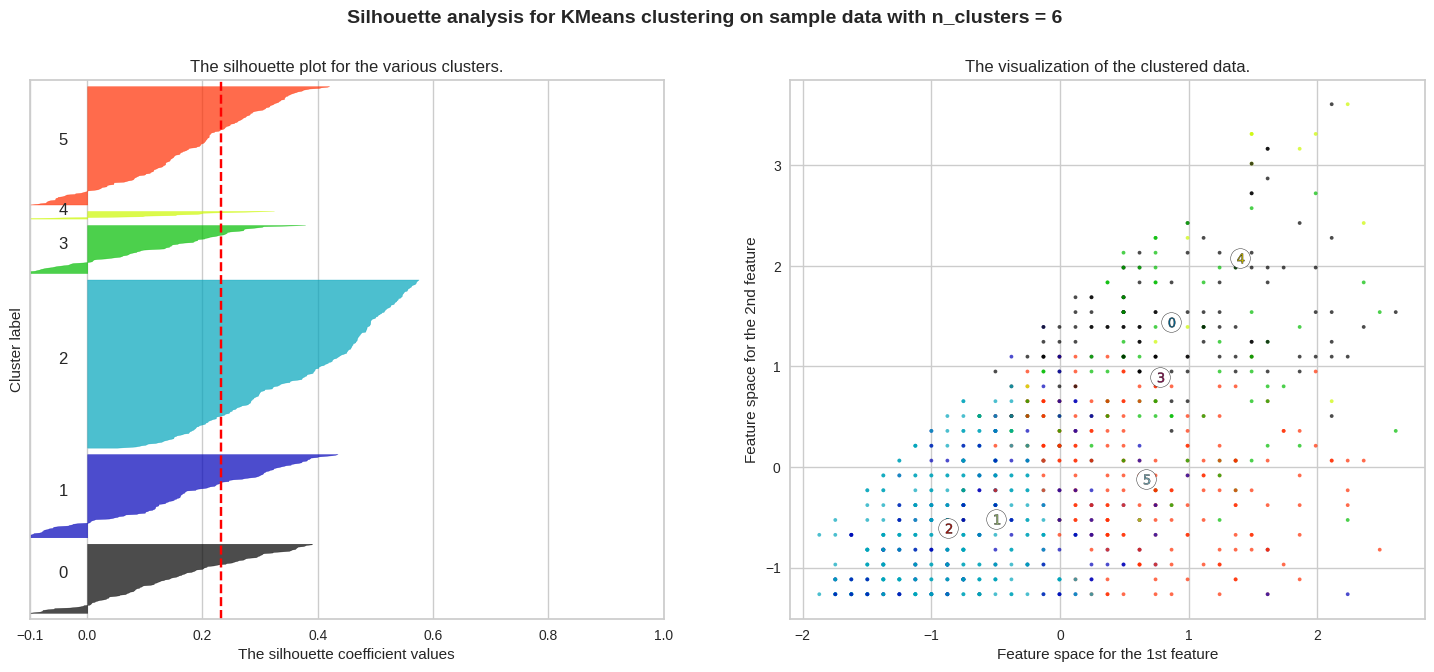

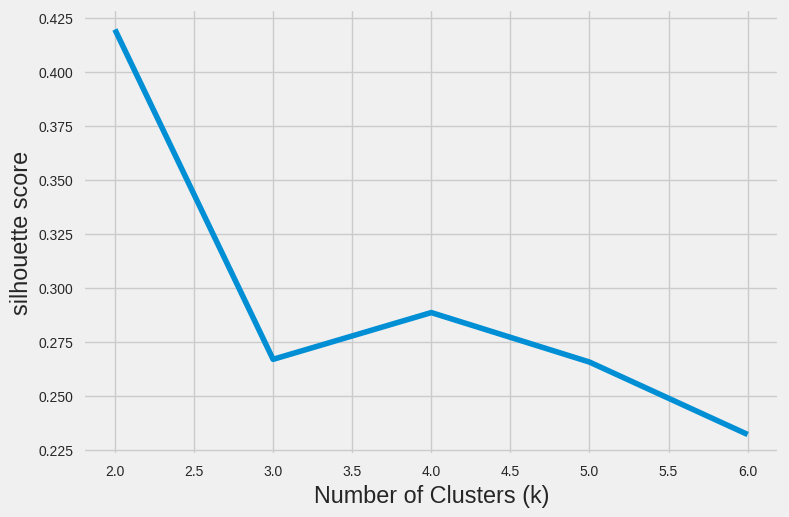

In [49]:
range_n_clusters = [2, 3, 4, 5, 6]
silhouette_avg_n_clusters = []

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = clusterer.fit_predict(scaled_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(scaled_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    silhouette_avg_n_clusters.append(silhouette_avg)
    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(scaled_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(scaled_df[:, 0], scaled_df[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()


style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_avg_n_clusters)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette score")
plt.show()

**Referencias**

* [Silhouette-method-better-than-elbow-method-to-find-optimal-clusters](https://towardsdatascience.com/silhouette-method-better-than-elbow-method-to-find-optimal-clusters-378d62ff6891)